inceptionv4于2016年提出，其历史贡献之一是将inception于residual模块进行结合，试验表明residual模块很大程度上提升了模型的收敛速度，同时有些情况下会带来精度上的轻微提升。另一个贡献是进一步优化了inceptionv结构，提出inceptionv4，一方面将结构统一化，另一方面加入更多inception模块，将网络做宽做深，达到了于inception-resnetv2相近的效果（IRv1精度低于IRv2）。

inceptionv4整体结构如下：
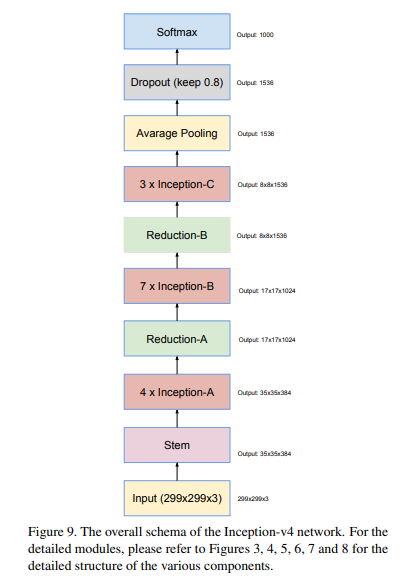

其中，inceptionA结构如下：
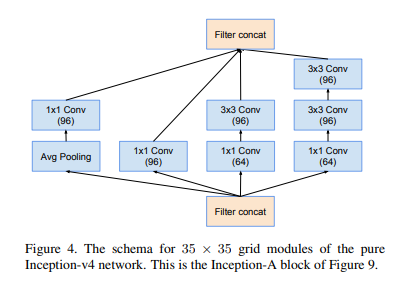

inceptionB结构如下：
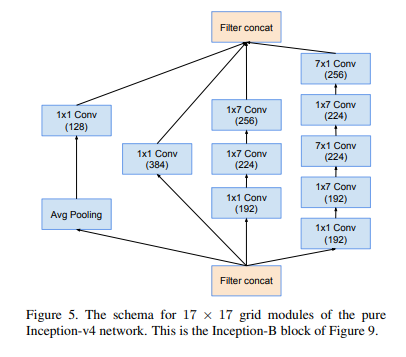

inceptionC结构如下：
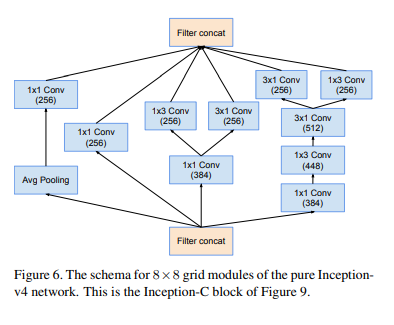

reductionA模块如下，其中V表示特征图尺寸变小：
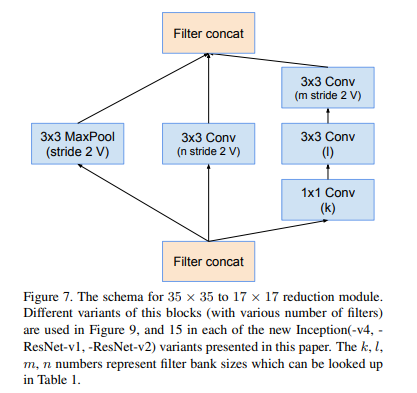

reductionB模块如下：
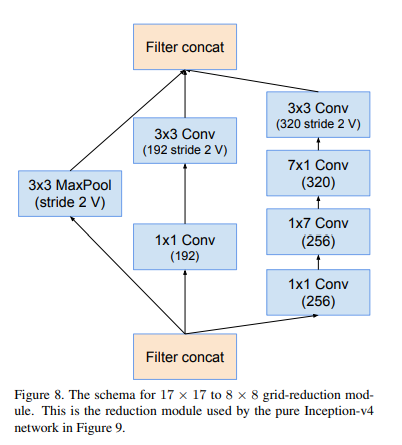

inception-resnet整体结构如下：
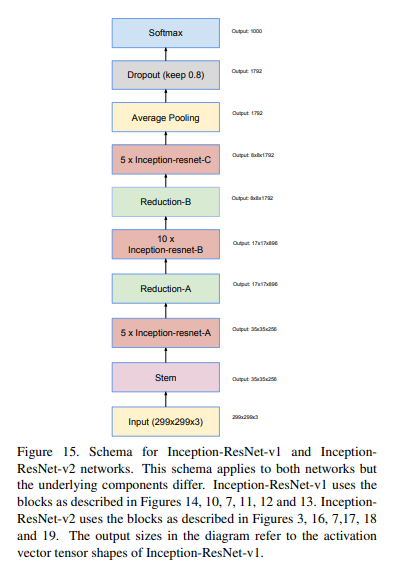

IR(inception-resnet)v1 stem结构如下：
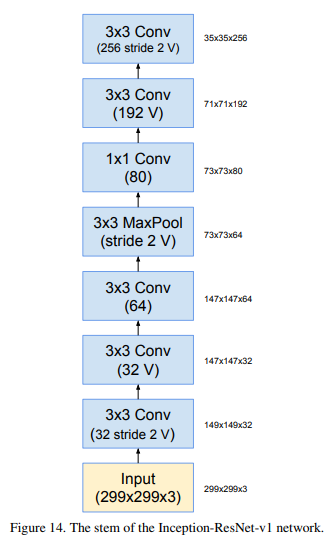

IR v1 IRA模块如下：
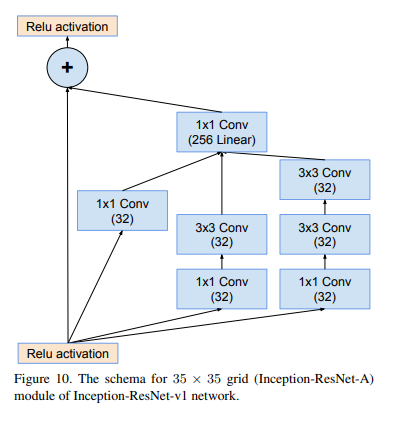

IRv1 reductionA模块如下：
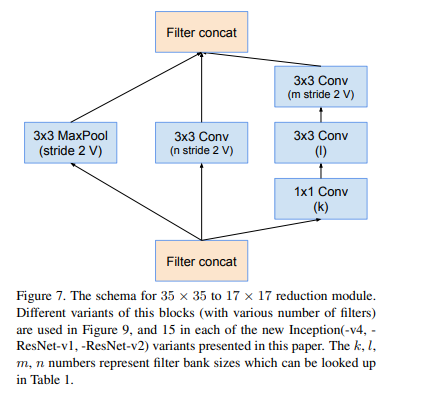

IRv1 IRB模块如下：
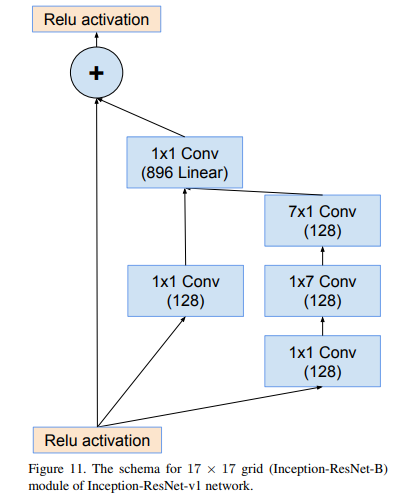

IRv1 reductionB模块如下：
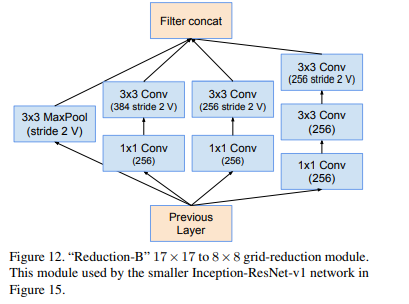

IRv1 IRC模块如下：
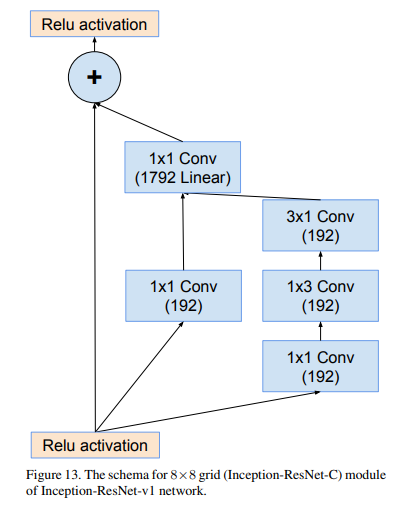

IRv2 stem结构如下：
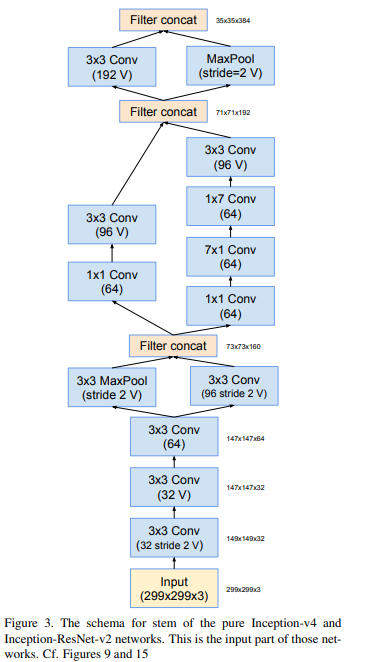

IRv2 IRA模块如下：
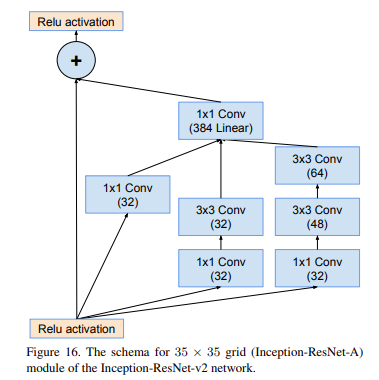

IRv2 reductionA模块如下：
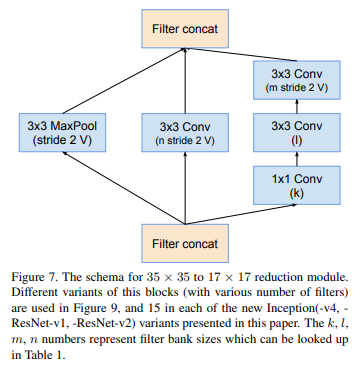

IRv2 IRB模块如下：
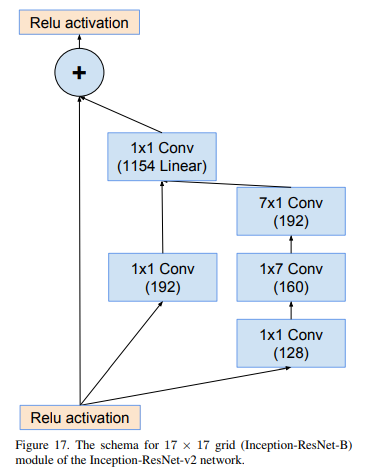

IRv2 reduction-B模块如下：
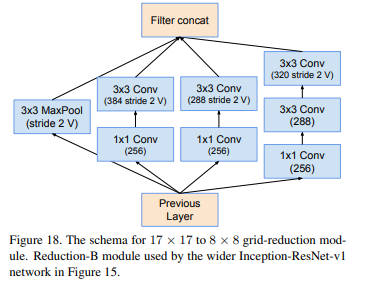

IRv2 IRC模块如下：
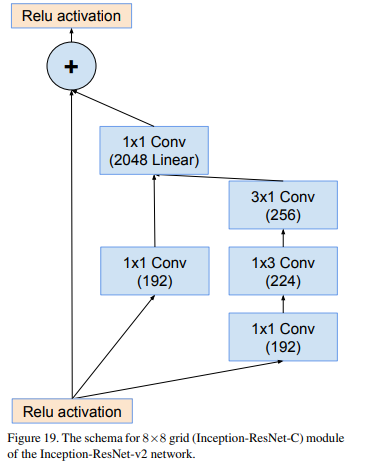

scaling of the residuals:若滤波器数量超过1000,那么残差变量开始不稳定，导致整个网络"dead"。也就是在全局池化层之前的最后一层输出开始全部变为0.这不能通过减小学习率或增加额外的BN层来解决。作者采用scale residuals来解决这个问题，即在将residual进行add之前，先对residuals进行缩放，因子为0.1至0.3。此外，在resnet的论文中，作者采用warmup的方式来解决这个问题，即以一个非常小的学习率开始，缓慢升至较大的学习率，第二阶段正常训练。但在本文中这个方法并没有起效。

训练细节：RMSProp。